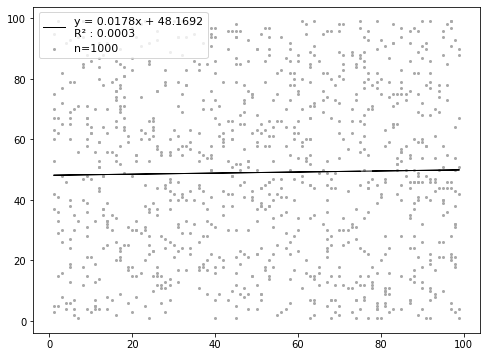

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interpn
from matplotlib.colors import Normalize

__all__ = ['scatter']


def _get_linear_regression(data1, data2):
    """
    Calculate linear regression between two sets of data.
    """
    x = np.array(data1).reshape((-1, 1))
    y = np.array(data2)
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    intercept = model.intercept_
    slope = model.coef_[0]
    # This is the same as if you calculated y_pred
    # by y_pred = slope * x + intercept
    y_pred = model.predict(x)
    return y_pred, r_sq, intercept, slope

def _density_scatter(x, y, ax=None, fig=None, sort=True, bins=20, **kwargs):
    """
    Creates scatter plot colored by 2d histogram
    """
    data, x_e, y_e = np.histogram2d(x, y, bins=bins, density=True)
    z = interpn((0.5*(x_e[1:] + x_e[:-1]), 0.5*(y_e[1:]+y_e[:-1])),
                data, np.vstack([x, y]).T, method="splinef2d", bounds_error=False)
    # To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0
    # Sort the points by density, so that the densest points are plotted last
    if sort:
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, **kwargs)
    norm = Normalize(vmin=np.min(z), vmax=np.max(z))

    return ax


def _gen_scatter(x, y, plotopts):
    """
    Generate scatter plot from x and y.
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    
    if plotopts['density']:
        ax = _density_scatter(x, y, ax=ax, fig=fig, bins=[100, 100],
                              s=4, cmap=plotopts['cmap'])
    else:
        plt.scatter(x, y, s=4, color=plotopts['color'],
                    label=f'n={np.count_nonzero(~np.isnan(x))}')
        
    if kwargs['linear_regression']:
        y_pred, r_sq, intercept, slope = _get_linear_regression(x, y)
        label = f"y = {slope:.4f}x + {intercept:.4f}\nR\u00b2 : {r_sq:.4f}"
        ax.plot(x, y_pred, color=plotopts['r color'], linewidth=1, label=label)
    
    plt.grid(plotopts['grid'])
    plt.legend(loc='upper left', fontsize=11)
    plt.title(plotopts['title'], loc='left')
    plt.title(plotopts['cycle'], loc='right', fontweight='semibold')
    plt.xlabel(plotopts['xlabel'], fontsize=12)
    plt.ylabel(plotopts['ylabel'], fontsize=12)
    
    return fig
        

def scatter(x, y, linear_regression=True, density=False, color='darkgray',
            cmap='magma', r_color='black', grid=False, title='EMCPy Scatter Plot',
            cycle=None, xlabel=None, ylabel=None):
    """
    Returns a figure of a scatter plot given x and y.
    
    Parameters
    ----------
    x, y : array type
        The data required to create scatter plot
    linear_regression : bool, optional
        (default is True)
    density : bool, optional
        Plot a density scatter plot if True (default is False)
    color : str, optional
        Color of scatter plot dots (default is 'darkgray')
    cmap : str, optional
        Color map of density scatter plot (default is 'magma')
    r_color : str, optional
        Color of regression line (default is 'black')
    grid : bool, optional
        Plot grid on scatter plot (default is False)
    title : str, optional
        Plot title (default is 'EMCPy Scatter Plot')
    cycle : str, optional
        Data date/cycle (default is None)
    xlabel : str, optional
        X label on plot (default is None)
    ylabel : str, optional
        Y label on plot (default is None)
    
    Returns
    -------
    fig
        Figure of the scatter plot
    """
    
    plotopts = {'linear regression': linear_regression, 'density': density,
                'color': color, 'cmap': cmap, 'r color': r_color, 'grid': grid,
                'title': title, 'cycle': cycle, 'xlabel': xlabel, 'ylabel': ylabel}
    
    fig = _gen_scatter(x, y, plotopts)
    
    return fig



###############################

x = np.random.randint(1,100, 1000)
y = np.random.randint(1,100, 1000)

fig = scatter(x,y)

In [16]:
x

array([94, 18,  3, 32, 10, 20, 87,  1, 94, 45, 66, 41, 41, 27, 90, 54,  5,
       97, 87, 31, 32, 44, 26, 73, 12, 35, 15, 94, 82, 56, 33, 41, 84, 40,
        4, 39, 41, 95, 12, 17, 33, 54, 11, 20,  8, 71,  1, 44,  2, 64, 75,
       61, 86, 68, 47, 17, 82, 75, 45, 55, 76, 27, 75,  6, 87, 94, 80, 48,
        8, 49, 13, 98, 98, 30, 13, 55, 48, 70, 14, 54, 11, 85, 46, 62, 31,
       55, 38, 44, 96, 32, 91, 13, 41, 19, 80, 50, 16, 21, 76, 25, 97, 99,
       22, 25, 69, 38, 25, 78,  9, 99, 24, 74, 83, 89, 30, 19, 43,  5, 92,
       65, 39, 74,  2, 16, 59, 59, 55, 67, 19, 86, 59,  6, 29, 39, 99, 72,
       77, 31, 17, 71, 23, 28, 98, 94, 20, 27, 71, 83, 61, 94, 24, 32, 65,
       80, 33, 61,  3, 87, 12, 64, 17, 81, 83, 36,  1, 39, 34,  5, 79, 62,
       85, 15, 64, 62, 39, 19, 18, 66, 58, 34, 88, 21, 85, 76, 68, 82, 14,
       74, 43, 87, 14, 62,  1, 12, 79,  8, 21, 54,  6, 85, 47, 50, 98,  5,
        3, 46, 44, 28, 15, 18, 21, 10, 43, 52, 68, 25,  1, 41, 37, 91,  8,
       19, 56, 58, 57, 27

In [11]:
y.shape

(1000,)